In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(2445030)

In [2]:
df = pd.read_csv("iris.csv",index_col=False)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
df['species'] = df['species'].replace(['setosa', 'versicolor', 'virginica'],[0,1,2])

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


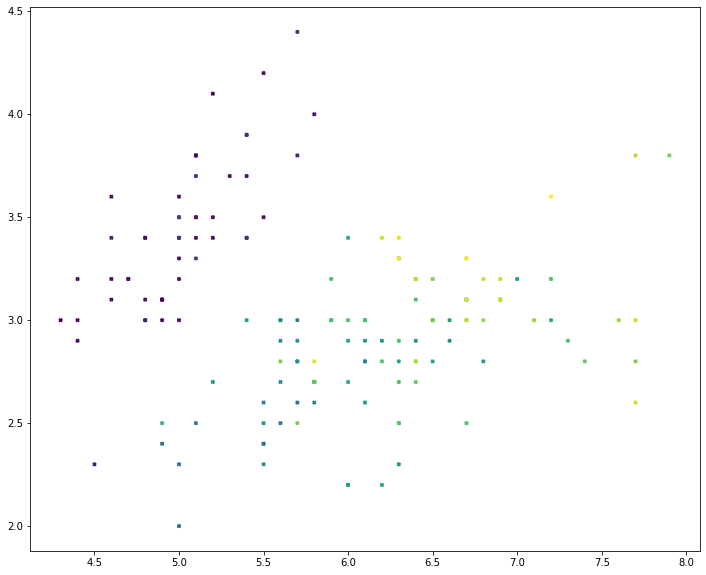

In [6]:
x = df.drop(['species'],axis=1)
y = df['species']
fig = plt.figure() 
fig.set_size_inches(12,10)
plt.scatter(x['sepal_length'],x['sepal_width'],x['petal_length'],x['petal_width'],marker= "X",sizes = [10])
plt.show()

## Applying K_means from sklearn

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size = 0.9)

## Initialing the centroid with best X_train example to fit the centroid

In [46]:
x_t = np.asarray(X_train)
x_test = np.asarray(X_test)
x_t.shape

(135, 4)

In [44]:
no_of_clusters=3
J=200.0
for i in range(1000):
    k= np.array([])
    a= np.random.randint(low= x_t.shape[0],size=no_of_clusters)
    for j in a: 
        b = np.reshape(x_t[j,:],(1,x_t[j,:].shape[0]))
        k = np.append(k,b)
    k = np.reshape(k , (no_of_clusters,x_t[j,:].shape[0]))
    c=np.sum((np.minimum(np.square(x_t-k[0][:]) ,np.square(x_t-k[1][:]),np.square(x_t-k[2][:]))))
    if( c < J):
        J = c
        k_final = k
        print(k_final,J)
   

[[4.9 3.  1.4 0.2]
 [6.3 2.3 4.4 1.3]
 [4.9 3.1 1.5 0.1]] 167.68999999999994
[[6.4 3.2 5.3 2.3]
 [5.  3.5 1.6 0.6]
 [6.  2.2 4.  1. ]] 156.32
[[6.  2.7 5.1 1.6]
 [5.4 3.4 1.7 0.2]
 [6.7 3.1 5.6 2.4]] 142.39000000000001
[[5.1 3.7 1.5 0.4]
 [6.  3.  4.8 1.8]
 [6.1 2.6 5.6 1.4]] 135.95999999999998
[[6.5 2.8 4.6 1.5]
 [5.  3.3 1.4 0.2]
 [7.7 3.  6.1 2.3]] 131.65
[[6.7 3.  5.  1.7]
 [5.1 3.5 1.4 0.3]
 [5.  3.3 1.4 0.2]] 119.91


##  Creating  the training loop after K_means centroids 

In [45]:
epoch =500
for i in range(epoch):
#     assiginig points to cluster centroids
    d=[]
    for j in range(x_t.shape[0]):
        a=np.square(np.sum(x_t[j][:]-k[0][:]))
        b=np.square(np.sum(x_t[j][:]-k[1][:]))
        c=np.square(np.sum(x_t[j][:]-k[2][:]))
        d.append(np.argmin([a,b,c]))
    
    d = np.asarray(d)
    d=  np.reshape(d,(len(d),1))
    
    x_t = np.append(x_t,d,axis=1)
                             
#     move the cluster centroid
    k2= np.array([])
    for n in range(no_of_clusters):
        a1 = x_t[np.where(x_t[:,-1]==n)]
        mean=np.sum(a1[:,:-1],axis=0)/a1.shape[0]
        mean = np.reshape(mean,(1,mean.shape[0]))
        # print(mean.shape)
        k2 = np.append(k2,mean)
        # print(k2.shape)
    x_t = np.delete(x_t,-1,1)
    k2 = np.reshape(k2 , (no_of_clusters,x_t[j,:].shape[0]))
    k=k2
    # print(k)
    
        

## Got the Centroid value in k

In [47]:
e=[]
for j in range(x_t.shape[0]):
        a1=np.square(np.sum(x_t[j][:]-k[0][:]))
        b1=np.square(np.sum(x_t[j][:]-k[1][:]))
        c1=np.square(np.sum(x_t[j][:]-k[2][:]))
        e.append(np.argmin([a1,b1,c1]))

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,d)

0.26666666666666666

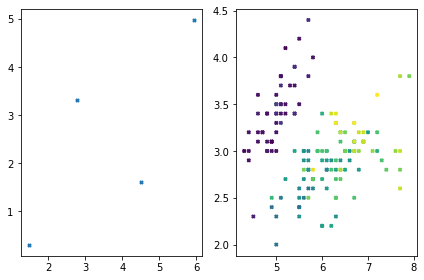

<Figure size 3456x3456 with 0 Axes>

In [56]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
# fig = plt.figure() 
# fig.set_size_inches(12,10)
plt.scatter(k[0][:],k[1][:],k[2][:],marker= "X",sizes = [10])


plt.subplot(1, 2, 2) # index 2
# fig = plt.figure() 
# fig.set_size_inches(12,10)
plt.scatter(x['sepal_length'],x['sepal_width'],x['petal_length'],x['petal_width'],marker= "X",sizes = [10])

plt.tight_layout()
plt.figure(figsize = (48, 48))
plt.show()